# Logistic Regression Project 1

- Mobile 데이터로 모델링
- Logistic Regression 모델링
- target = CHURN

In [1]:
# Library 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%config InlineBackend.figure_format='retina'

In [2]:
# data 불러오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/mobile_cust_churn.csv'
data = pd.read_csv(path)

In [3]:
# 상위 5개 행 확인
data.head()

,id,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,0,31953,0,6,313378,161,0,4,unsat,little,no,STAY
1,2,1,36147,0,13,800586,244,0,6,unsat,little,considering,STAY
2,3,1,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY
3,4,0,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE
4,5,1,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY


In [4]:
# 하위 5개 행 확인
data.tail()

,id,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
19995,19996,0,153252,0,23,368403,597,1,6,very_sat,little,actively_looking_into_it,STAY
19996,19997,1,107126,71,82,237397,609,5,2,very_sat,very_little,no,STAY
19997,19998,0,78529,0,66,172589,275,0,2,unsat,very_high,considering,LEAVE
19998,19999,0,78674,47,41,572406,288,4,2,very_unsat,little,considering,LEAVE
19999,20000,0,124697,0,0,845575,808,24,14,unsat,high,actively_looking_into_it,LEAVE


In [5]:
# 기초통계량 확인
data.describe()

,id,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,0.502400,80281.447750,85.979550,23.898650,493155.264250,389.615100,8.000700,6.002250
std,5773.647028,0.500007,41680.586319,85.992324,26.816645,252407.884692,213.820682,8.925418,4.402558
min,1.000000,0.000000,20007.000000,-2.000000,0.000000,150002.000000,130.000000,0.000000,1.000000
25%,5000.750000,0.000000,42217.000000,0.000000,0.000000,263714.250000,219.000000,1.000000,2.000000
50%,10000.500000,1.000000,75366.500000,59.000000,14.000000,452259.500000,326.000000,4.000000,5.000000
75%,15000.250000,1.000000,115881.750000,179.000000,41.000000,702378.000000,533.250000,15.000000,10.000000
max,20000.000000,1.000000,159983.000000,335.000000,89.000000,999996.000000,899.000000,29.000000,15.000000


In [6]:
# 변수 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           20000 non-null  int64 
 1   COLLEGE                      20000 non-null  int64 
 2   INCOME                       20000 non-null  int64 
 3   OVERAGE                      20000 non-null  int64 
 4   LEFTOVER                     20000 non-null  int64 
 5   HOUSE                        20000 non-null  int64 
 6   HANDSET_PRICE                20000 non-null  int64 
 7   OVER_15MINS_CALLS_PER_MONTH  20000 non-null  int64 
 8   AVERAGE_CALL_DURATION        20000 non-null  int64 
 9   REPORTED_SATISFACTION        20000 non-null  object
 10  REPORTED_USAGE_LEVEL         20000 non-null  object
 11  CONSIDERING_CHANGE_OF_PLAN   20000 non-null  object
 12  CHURN                        20000 non-null  object
dtypes: int64(9), object(4)
memory u

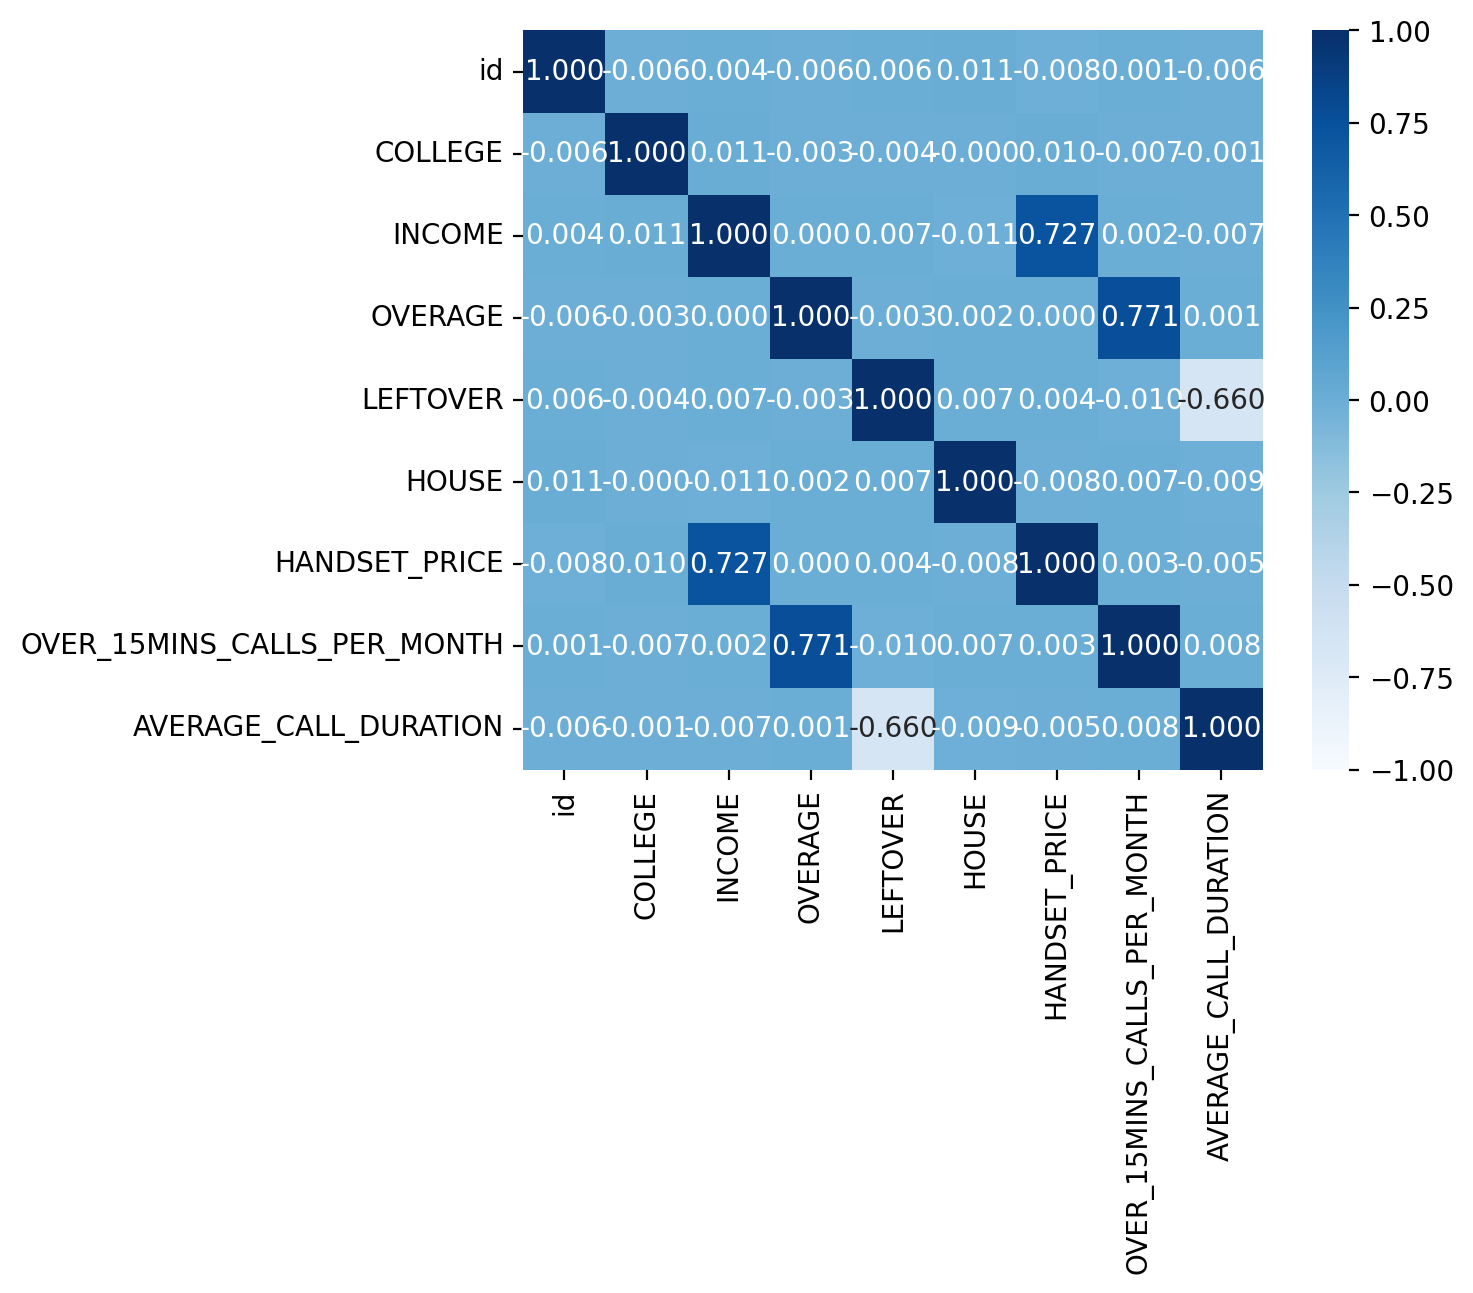

In [7]:
# 상관관게 heatmap으로 확인
sns.heatmap(data.corr(),
            annot=True,
            fmt='.3f',
            vmin=-1, vmax=1,
            square=True,
            cmap='Blues')
plt.show()

In [9]:
# target 값 개수 확인
data['CHURN'].value_counts()

STAY     10148
LEAVE     9852
Name: CHURN, dtype: int64

In [10]:
# id feature 제거
drop_cols = ['id']
data.drop(drop_cols, axis=1, inplace=True)
data.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,0,31953,0,6,313378,161,0,4,unsat,little,no,STAY
1,1,36147,0,13,800586,244,0,6,unsat,little,considering,STAY
2,1,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY
3,0,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE
4,1,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY


In [11]:
# x, y 분리
target = 'CHURN'

x = data.drop(target, axis=1)
y = data.loc[:, target]

In [12]:
# 가변수화
# 대상 : 'REPORTED_SATISFACTION', 'REPORTED_USAGE_LEVEL', 'CONSIDERING_CHANGE_OF_PLAN'
dumm_cols = ['REPORTED_SATISFACTION', 'REPORTED_USAGE_LEVEL', 'CONSIDERING_CHANGE_OF_PLAN']
x = pd.get_dummies(data=x, columns=dumm_cols, drop_first=True)
x.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION_sat,REPORTED_SATISFACTION_unsat,REPORTED_SATISFACTION_very_sat,REPORTED_SATISFACTION_very_unsat,REPORTED_USAGE_LEVEL_high,REPORTED_USAGE_LEVEL_little,REPORTED_USAGE_LEVEL_very_high,REPORTED_USAGE_LEVEL_very_little,CONSIDERING_CHANGE_OF_PLAN_considering,CONSIDERING_CHANGE_OF_PLAN_never_thought,CONSIDERING_CHANGE_OF_PLAN_no,CONSIDERING_CHANGE_OF_PLAN_perhaps
0,0,31953,0,6,313378,161,0,4,0,1,0,0,0,1,0,0,0,0,1,0
1,1,36147,0,13,800586,244,0,6,0,1,0,0,0,1,0,0,1,0,0,0
2,1,27273,230,0,305049,201,16,15,0,1,0,0,0,0,0,1,0,0,0,1
3,0,120070,38,33,788235,780,3,2,0,1,0,0,0,0,1,0,1,0,0,0
4,1,29215,208,85,224784,241,21,1,0,0,0,1,0,1,0,0,0,1,0,0


In [13]:
# train, test 분리
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [14]:
# 모델링
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print('confusion matrix:\n', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion matrix:
 [[1795 1140]
 [1104 1961]]
              precision    recall  f1-score   support

       LEAVE       0.62      0.61      0.62      2935
        STAY       0.63      0.64      0.64      3065

    accuracy                           0.63      6000
   macro avg       0.63      0.63      0.63      6000
weighted avg       0.63      0.63      0.63      6000



In [16]:
p = model.predict_proba(x_test)
p.round(3)[:10]

array([[0.633, 0.367],
       [0.633, 0.367],
       [0.715, 0.285],
       [0.837, 0.163],
       [0.717, 0.283],
       [0.413, 0.587],
       [0.221, 0.779],
       [0.391, 0.609],
       [0.266, 0.734],
       [0.288, 0.712]])

In [17]:
print(y_pred[:10])
print(y_test.values[:10])

['LEAVE' 'LEAVE' 'LEAVE' 'LEAVE' 'LEAVE' 'STAY' 'STAY' 'STAY' 'STAY'
 'STAY']
['LEAVE' 'STAY' 'LEAVE' 'LEAVE' 'STAY' 'STAY' 'STAY' 'STAY' 'STAY' 'STAY']


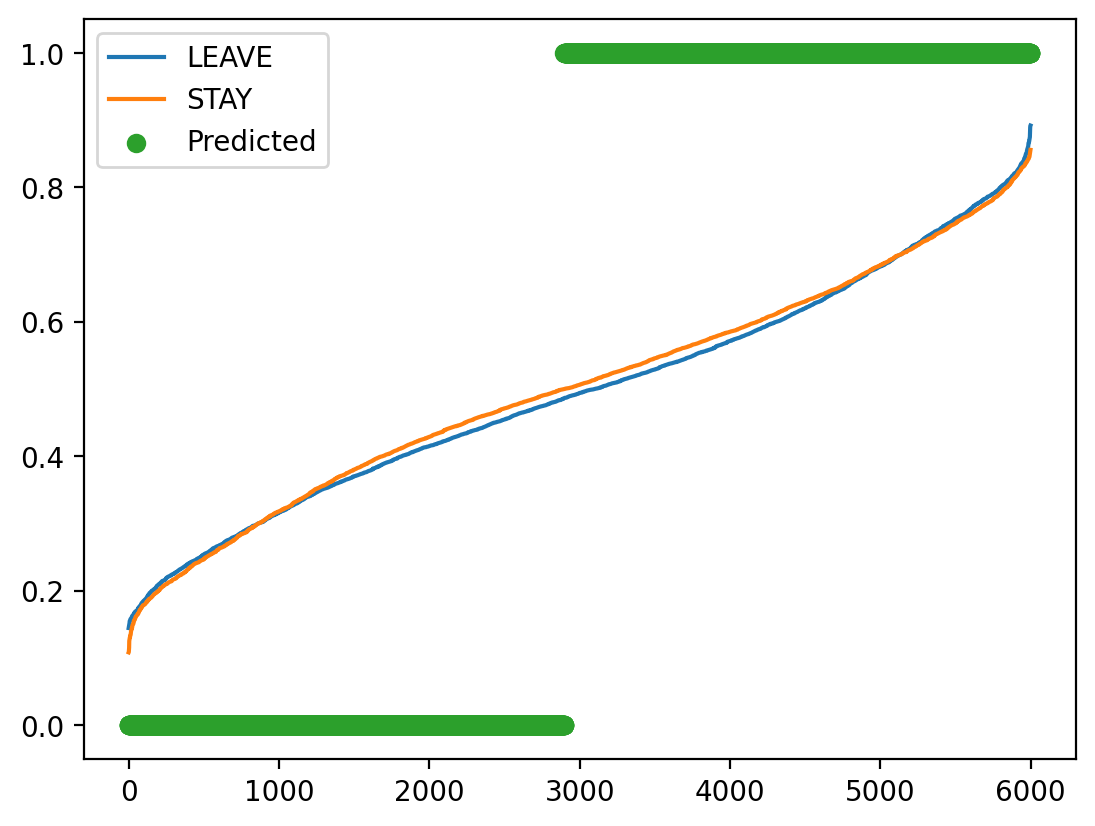

In [35]:
# 데이터 매핑
df = pd.Series(y_pred)
df = df.map({'LEAVE': 0, 'STAY': 1})
df.sort_values(inplace=True)
df = df.reset_index(drop=True)

# 시각화
plt.plot(np.sort(p[:, 0]), label='LEAVE')
plt.plot(np.sort(p[:, 1]), label='STAY')
plt.scatter(df.index, df.values, label='Predicted', color='tab:green')
plt.legend()
plt.show()